In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"


In [3]:
model = cv2.dnn_DetectionModel(config_file, frozen_model)


In [4]:
classlabels=[]
file_name = 'Labels_80.txt'
with open(file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlabels))

80


< cv2.dnn.Model 000001CE0DCC9990>

In [8]:
image = cv2.imread("inputfile")

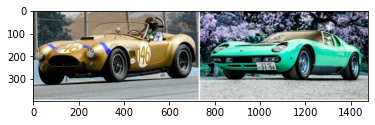

In [9]:
plt.imshow(image)
plt.show()

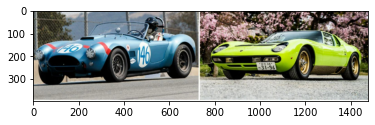

In [15]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
model.setInputSize(320,320) #size of the figure in config file
model.setInputScale(1.0/127.5) # half of 255
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True) #for automatically swapping colors to RB

< cv2.dnn.Model 000001CE0F338FD0>

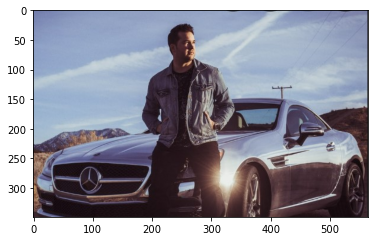

In [35]:
image = cv2.imread("inputfile") #eg "image.jpg"
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
ClassIndex, confidence, bbox = model.detect(image, confThreshold=0.5)

In [37]:
print(ClassIndex)

[1 3]


In [42]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidence, bbox):
    cv2.rectangle(image,boxes,(255,0,0),2)
    cv2.putText(image, classlabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color =(0,255,0), thickness=3)

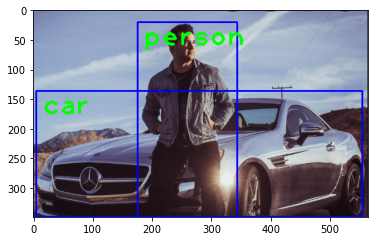

In [43]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# for video

In [48]:
cap=cv2.VideoCapture("inputfile") #eg "video.jpg"

In [49]:
#if not opened
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("error in opening")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex, confidence, bbox):
            if(ClassInd<=80):
                cv2.rectangle(image,boxes,(255,0,0),2)
                cv2.putText(image, classlabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color =(0,255,0), thickness=3)
                
           
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

[1 1 1 7]
[1 1 7 1]
[1 7 1]
[1 1 7 1]
[1 1 7 1]
[1 1 7 1]
[1 1 7 1]
[1 1 7 1]
[1 1 7 1]
[1 1 7]
[1 1]
[1 1 1]
[1 1 1]
[1 1 7]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1]
[ 1  1 64]
[1 1 1]
[1 1]
[ 1  1 64]
[ 1  1 64]
[1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1]
[1 1]
[ 1  1 28]
[1 1 1 1]
[1 1 1]
[ 1  1 28]
[ 1  1  1  1 28  1]
[1 1 1 1]
[ 1  1 28]
[ 1 28  1  1  1]
[28  1  1  1]
[ 1  1 28]
[ 1  1  1 28  1]
[1]
[1 1]
[1 1 1]
[1 1]
()
[ 1  1 28  1  1]
[1 1]
[1]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[1 1]
[1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1]
[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
